In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [8]:
# Load and preprocess data
df = pd.read_csv("Country-data.csv")

# Select relevant features
features = [
    "child_mort",
    "health",
    "income",
    "inflation",
    "life_expec",
    "total_fer",
    "gdpp",
]
X = df[features].values
countries = df["country"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
cov_matrix = np.cov(X_scaled.T)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Create PCA object and transform data
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


Explained variance ratio for each component:
PC1: 0.5485
PC2: 0.1541
PC3: 0.1418
PC4: 0.1004
PC5: 0.0326
PC6: 0.0128
PC7: 0.0097

Number of components needed for 80% variance: 3


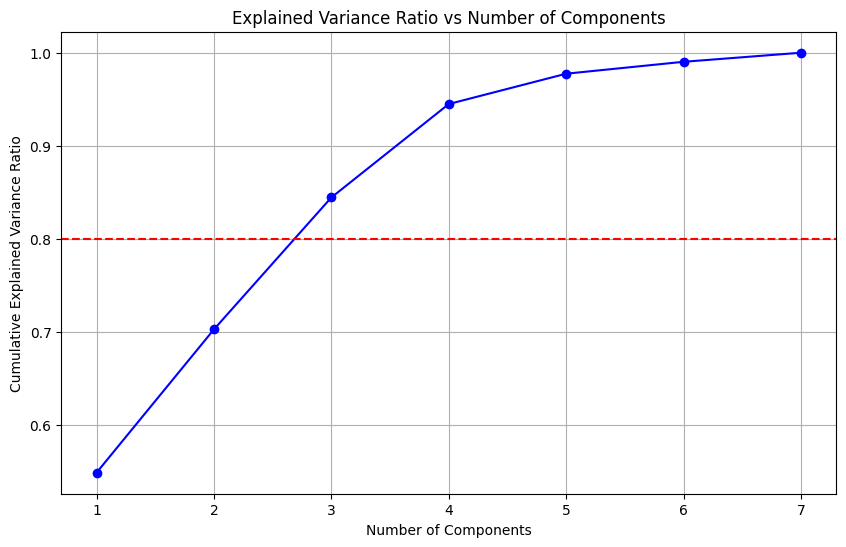

In [10]:
print("\nExplained variance ratio for each component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

# (iii) Determine components for 80% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1
print(f"\nNumber of components needed for 80% variance: {n_components_80}")

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    np.cumsum(pca.explained_variance_ratio_),
    "bo-",
)
plt.axhline(y=0.8, color="r", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Explained Variance Ratio vs Number of Components")
plt.grid(True)
plt.show()

In [11]:
kmeans_2d = KMeans(n_clusters=4, random_state=42)
labels_2d = kmeans_2d.fit_predict(X_pca[:, :2])


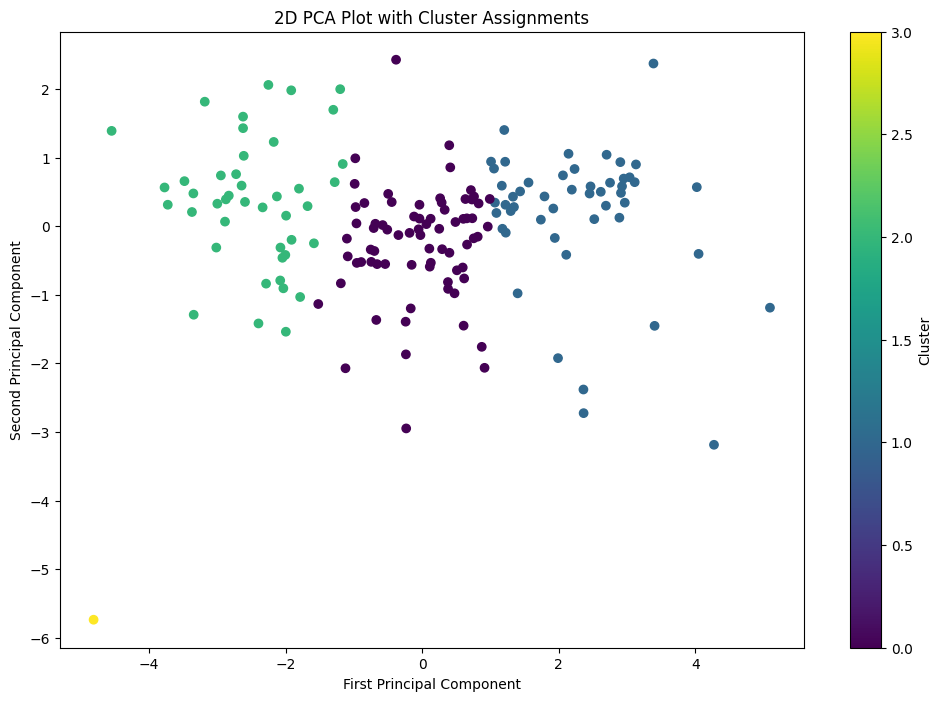

In [14]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_2d, cmap="viridis")

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("2D PCA Plot with Cluster Assignments")
plt.colorbar(scatter, label="Cluster")
plt.show()

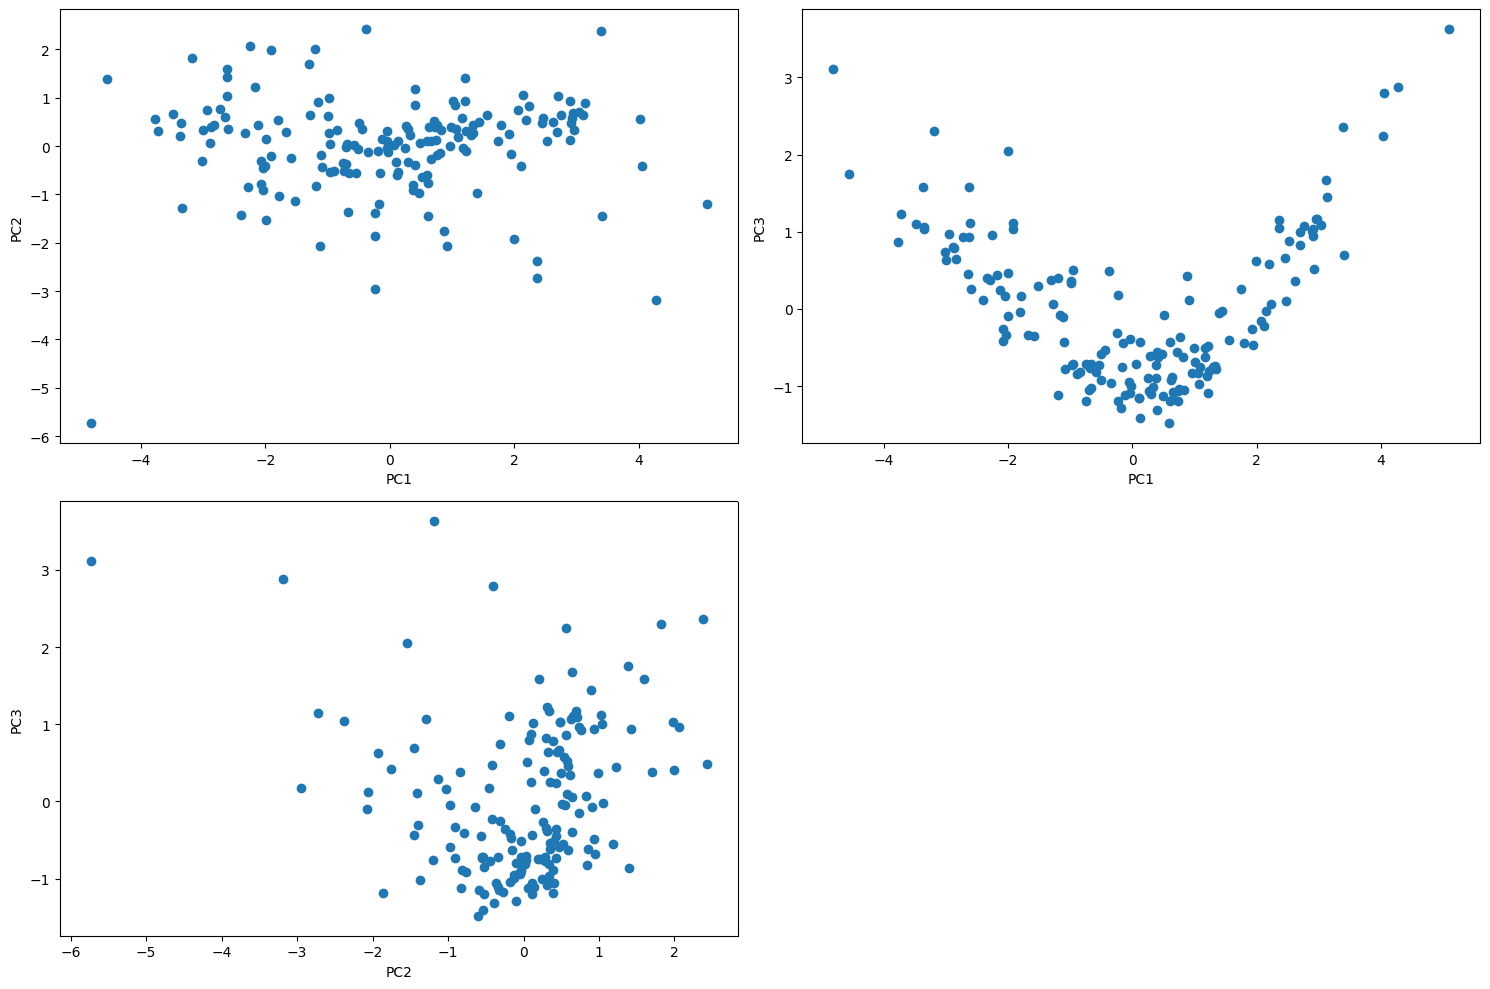

In [21]:
plt.figure(figsize=(15, 10))
plot_idx = 1
for i in range(3):
    for j in range(3):
        if i < j:  # Only plot upper triangle to avoid redundancy
            plt.subplot(2, 2, plot_idx)
            plt.scatter(X_pca[:, i], X_pca[:, j])
            plt.xlabel(f"PC{i+1}")
            plt.ylabel(f"PC{j+1}")
            plot_idx += 1
plt.tight_layout()
plt.show()

In [22]:
kmeans_3d = KMeans(n_clusters=4, random_state=42)
labels_3d = kmeans_3d.fit_predict(X_pca[:, :3])

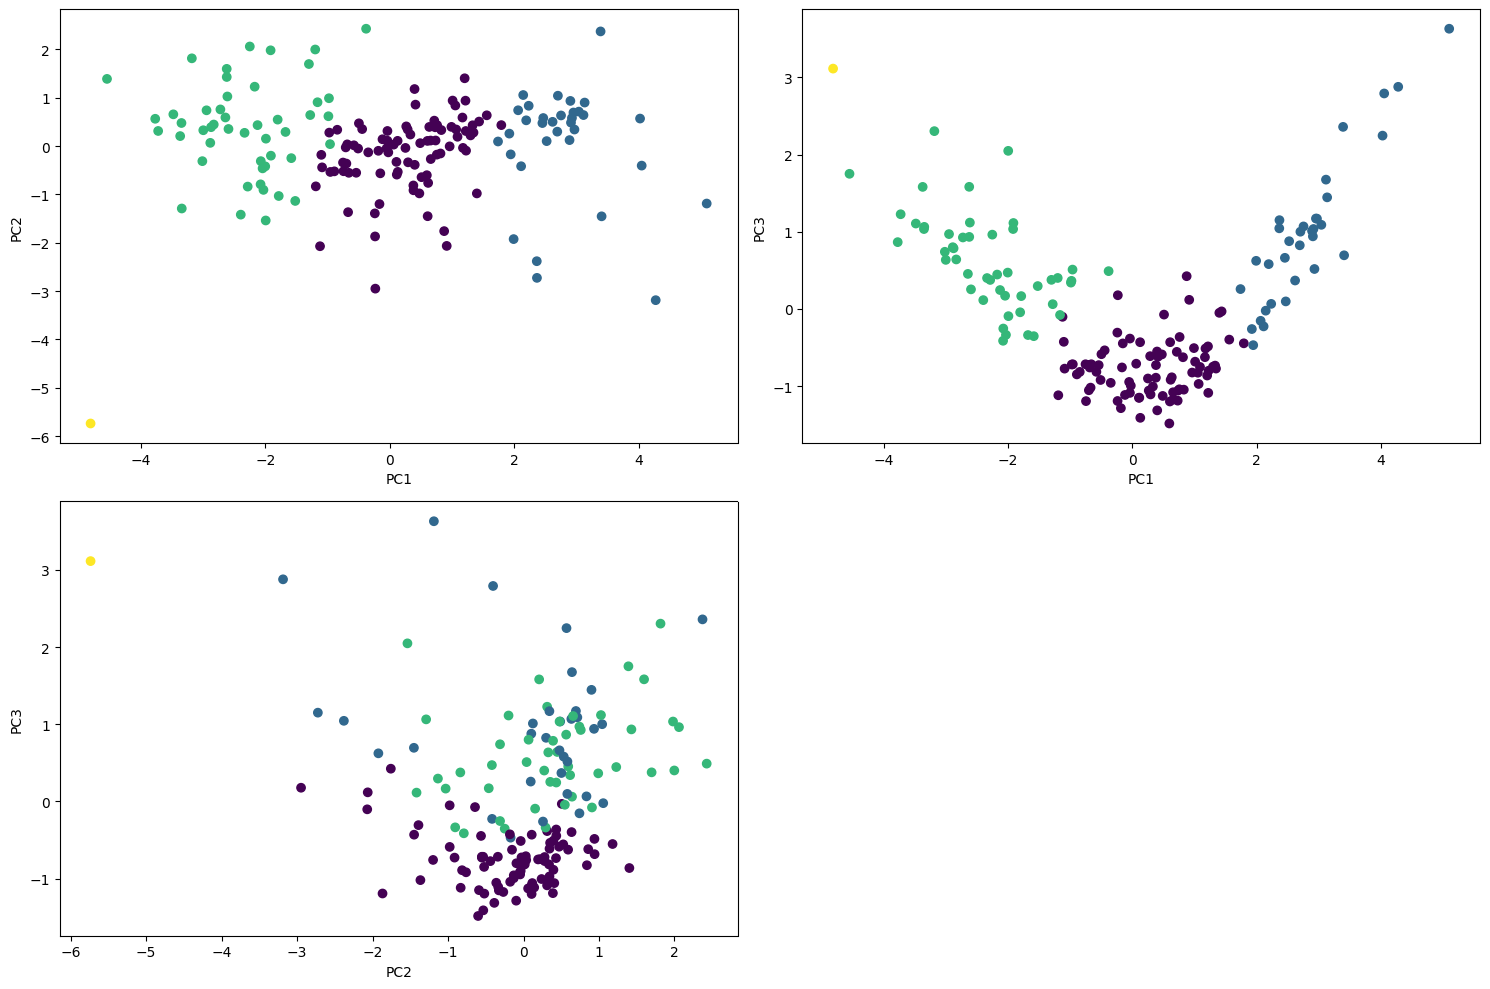

In [23]:
plt.figure(figsize=(15, 10))
plot_idx = 1
for i in range(3):
    for j in range(3):
        if i < j:  # Only plot upper triangle to avoid redundancy
            plt.subplot(2, 2, plot_idx)
            plt.scatter(X_pca[:, i], X_pca[:, j], c=labels_3d, cmap="viridis")
            plt.xlabel(f"PC{i+1}")
            plt.ylabel(f"PC{j+1}")
            plot_idx += 1
plt.tight_layout()
plt.show()

In [28]:
kmeans_original = KMeans(n_clusters=4, random_state=42)
labels_original = kmeans_original.fit_predict(X_scaled)

print("\nDetailed Clustering Comparison:")
print("\n1. Cluster Sizes:")
print("Original data clusters:", np.bincount(labels_original))
print("2D PCA clusters:", np.bincount(labels_2d))
print("3D PCA clusters:", np.bincount(labels_3d))

# Show example countries in each cluster for each method
print("\n2. Example Countries in Each Cluster:")
for method, labels in [
    ("Original", labels_original),
    ("2D PCA", labels_2d),
    ("3D PCA", labels_3d),
]:
    print(f"\n{method} Clustering:")
    for cluster in range(4):
        cluster_countries = countries[labels == cluster]
        print(f"Cluster {cluster}: {', '.join(cluster_countries[:7])}")



Detailed Clustering Comparison:

1. Cluster Sizes:
Original data clusters: [47 32 87  1]
2D PCA clusters: [73 50 43  1]
3D PCA clusters: [85 33 48  1]

2. Example Countries in Each Cluster:

Original Clustering:
Cluster 0: Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon
Cluster 1: Australia, Austria, Belgium, Brunei, Canada, Cyprus, Denmark
Cluster 2: Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas
Cluster 3: Nigeria

2D PCA Clustering:
Cluster 0: Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bangladesh
Cluster 1: Australia, Austria, Bahamas, Bahrain, Barbados, Belgium, Bosnia and Herzegovina
Cluster 2: Afghanistan, Angola, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic
Cluster 3: Nigeria

3D PCA Clustering:
Cluster 0: Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas
Cluster 1: Australia, Austria, Belgium, Brunei, Canada, Cyprus, Denmark
Cluster 2: Afghanistan,

The results between the 2D and 3D PCA clustering are very similar. So, the key point is that the 2D PCA clustering is a good approximation of the 3D PCA clustering.